In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import feather
import os as os
os.environ["PROJ_LIB"] = "/Users/john/miniconda3/share/proj"; #fixr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import cartopy.crs as ccrs

In [3]:
dat = pd.read_csv('AIS/AIS.csv')

/Users/john/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
dat.head()

,segment_id,message_id,type,mmsi,timestamp,lat,lon,speed,course,heading,shipname,callsign,destination,elevation_m,distance_from_shore_m,distance_from_port_m,nnet_score,logistic_score
0,477942900-2015-11-26T08:48:16.000000Z,629ca57a-6c5d-5c0d-abdb-9389cfefc8a7,AIS.27,477942900,2016-01-02 16:49:25 UTC,5.190000,81.863333,11.0,24.0,NaN,NaN,NaN,NaN,-4144.0,127000.0,133289.219,0.0,0.0
1,657107800-2015-10-02T06:17:31.000000Z,36e85e77-bfd6-56ec-9cb2-d7dfb7743079,AIS.27,657107800,2016-01-02 00:09:16 UTC,4.138333,7.498333,0.0,255.0,NaN,NaN,NaN,NaN,-38.0,34000.0,0.000,NaN,1.0
2,376918000-2015-08-17T21:35:59.000000Z,06883482-00ed-5f21-aa54-57ce2970902f,AIS.27,376918000,2016-01-02 21:37:04 UTC,-5.173333,11.616667,5.0,330.0,NaN,NaN,NaN,NaN,-102.0,44000.0,10477.952,0.0,0.0
3,231087000-2013-10-10T15:10:04.000000Z,d18280d1-5f50-5ace-9f82-0b3e98b578a4,AIS.27,231087000,2016-01-02 00:25:50 UTC,60.685000,-6.256667,4.0,74.0,NaN,NaN,NaN,NaN,-232.0,82000.0,91634.977,1.0,1.0
4,341884000-2016-01-02T07:20:43.000000Z,883ac296-690a-521e-9f32-1831cb80a356,AIS.27,341884000,2016-01-02 09:19:48 UTC,-15.175000,12.046667,0.0,28.0,NaN,NaN,NaN,NaN,-101.0,4000.0,8585.209,0.0,0.0


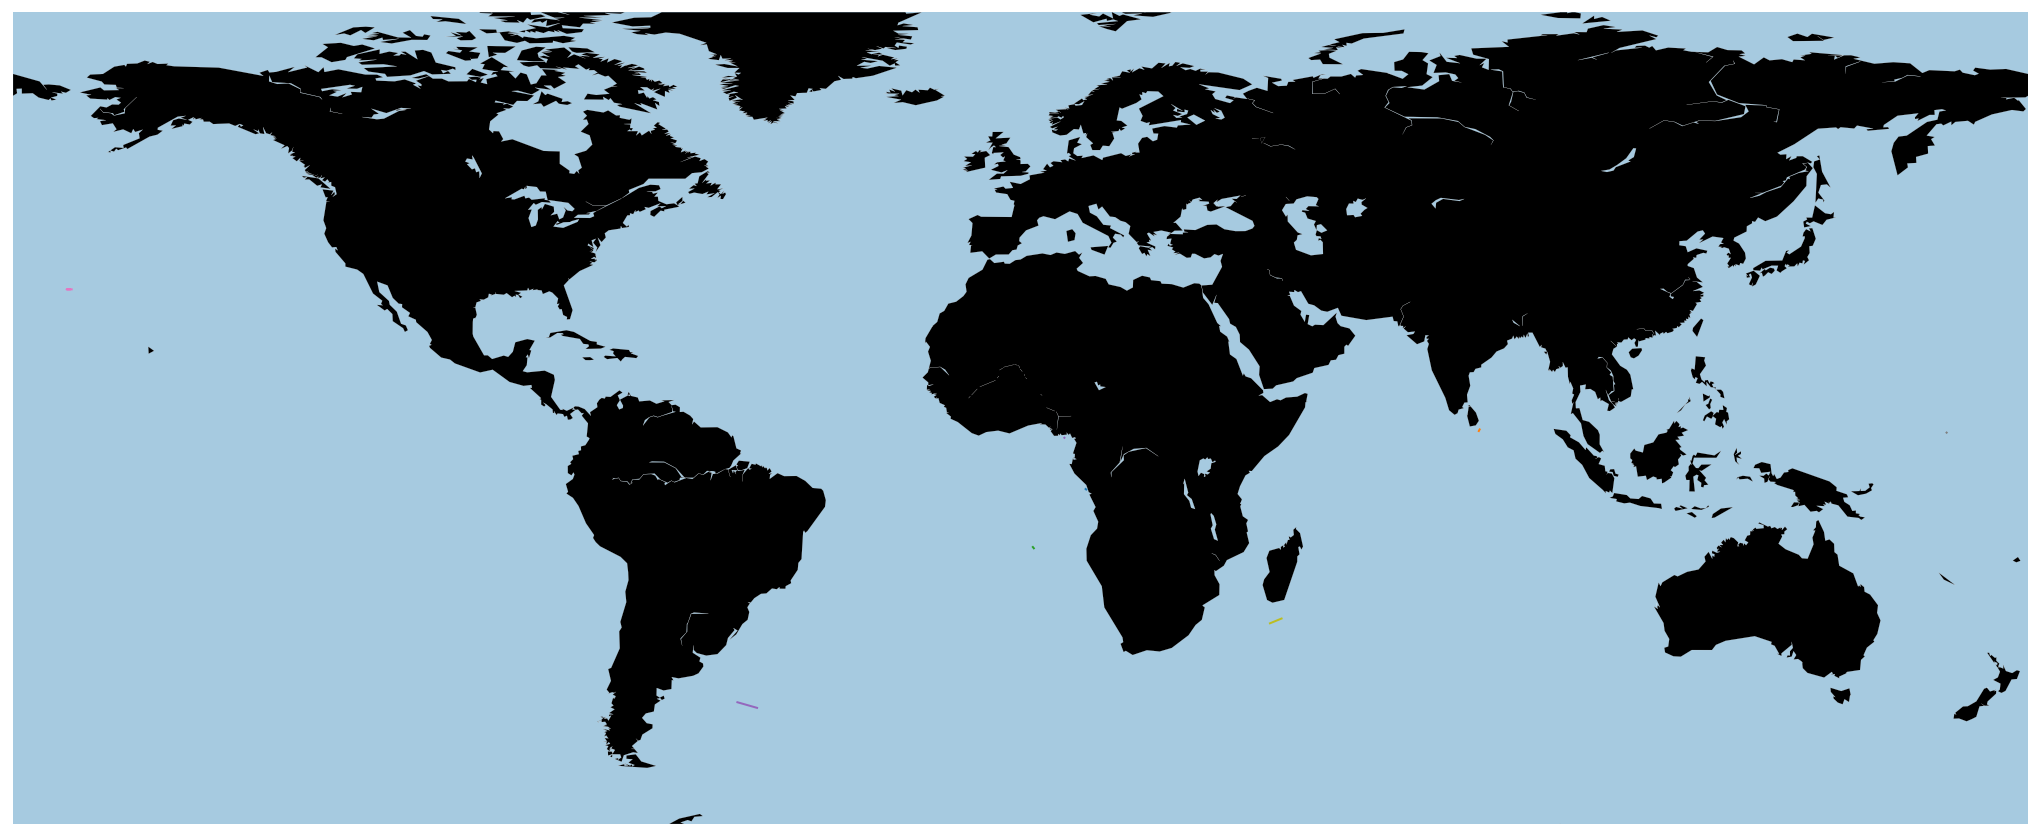

In [8]:
# Set the dimension of the figure
#dat2 = dat[dat['mmsi'] == 477942900]
dat2 = dat[0:500]
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=1)
m.drawcoastlines(linewidth=0.1, color="white")
#lon = dat2['lon'][:]sublime
#lat = dat2['lat'][:]

for mmsi, track in dat2.groupby('mmsi'):

    latitude = track.lat.values
    longitude = track.lon.values

    #Convert latitude and longitude to coordinates X and Y
    x, y = m(longitude, latitude)

    #Plot the points on the map
    m.plot(x,y,'-', label=mmsi)

#lg = m.legend()
#lg.get_frame().set_facecolor('grey')

#x, y = m(lon, lat)
#m.plot(x, y, 'o-', markersize=5, linewidth=1) 

plt.show()

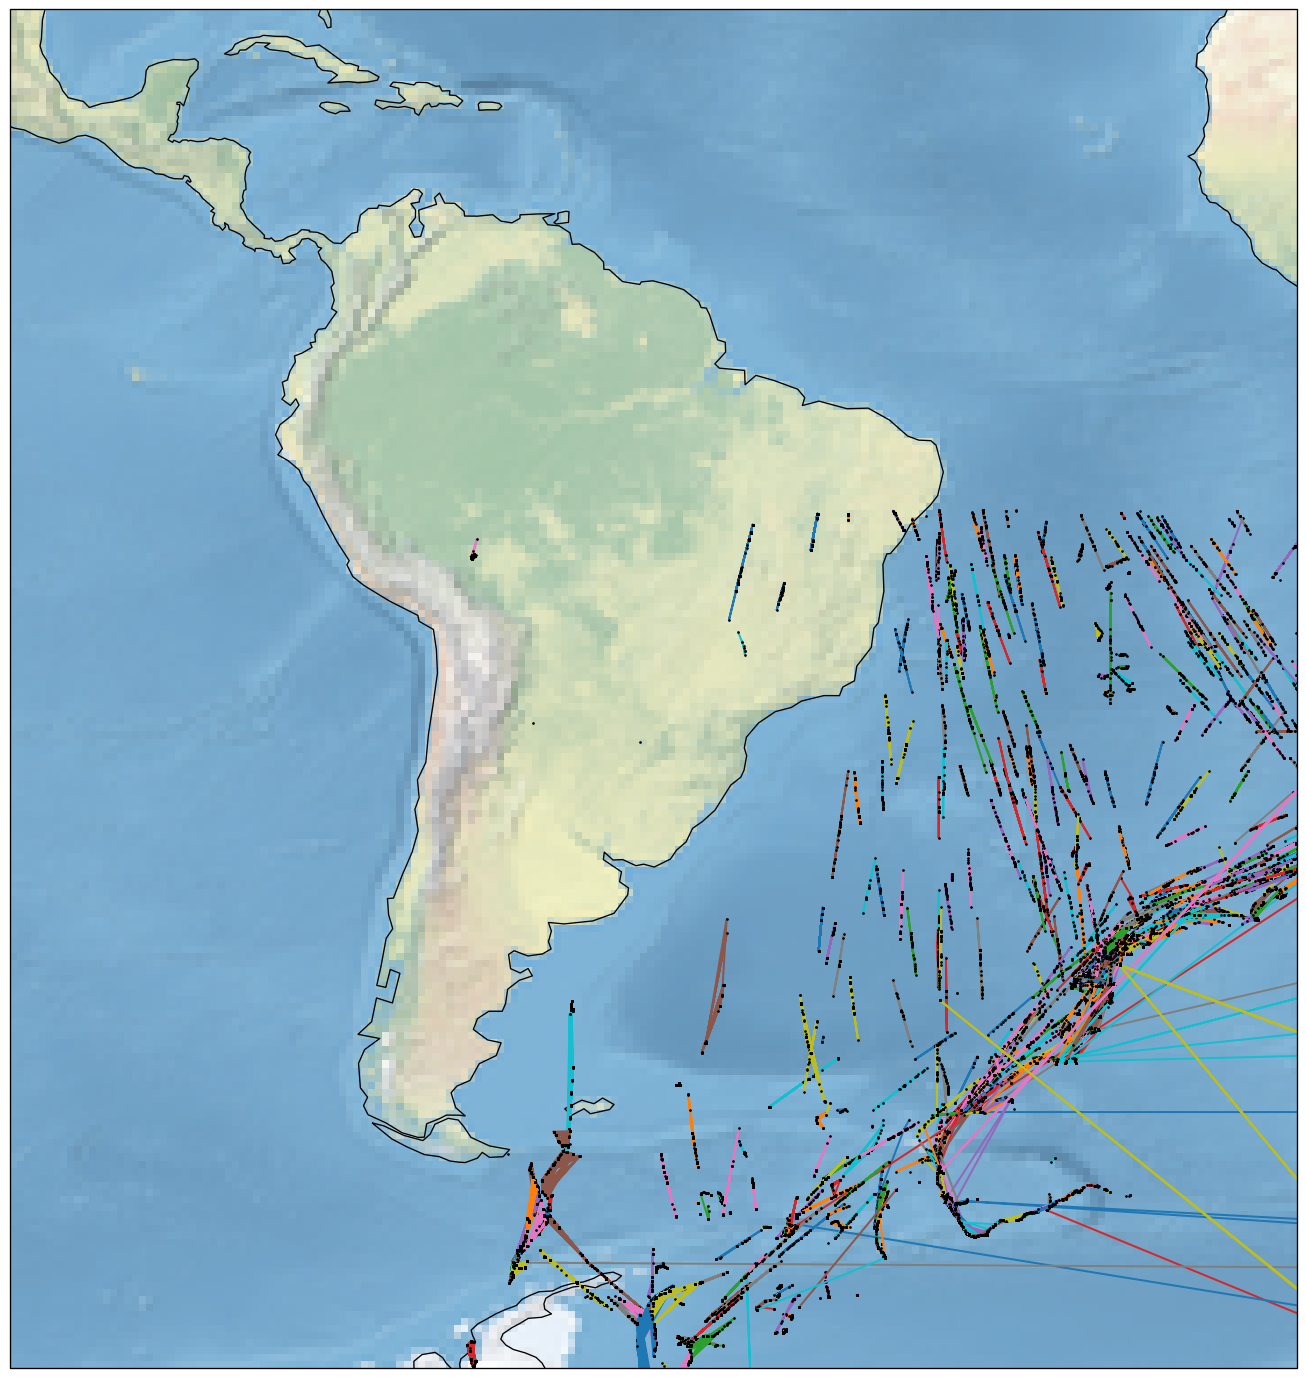

In [28]:
lon1 = -100
lon2 = -10
lat1 = 25
lat2 = -70

#dat2 = dat[0:100]

dat2 = dat[(dat['lon'] >= lon1) & (dat['lon'] <= lon2) & (dat['lat'] <= lat1) & (dat['lat'] >= lat2)]

#dat2 = dat
my_dpi=96
fig = plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
#fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
# make the map global rather than have it zoom in to
# the extents of any plotted data
#ax.set_global()
ax.stock_img()
ax.coastlines()
    
for mmsi, track in dat2.groupby('mmsi'):

    x = track.lat.values
    y = track.lon.values

    #Convert latitude and longitude to coordinates X and Y
    #x, y = m(longitude, latitude)

    #Plot the points on the map
    #m.plot(x,y,'-', label=mmsi)
    
    ax.plot(x, y, label=mmsi, transform=ccrs.PlateCarree())
    ax.plot(x, y, 'o', markersize=1, color = 'black', label=mmsi, transform=ccrs.PlateCarree())
    
plt.savefig('figures/SA_map.png')
plt.show()